In [17]:
from disk_utils_jax import jax_model, jax_model_scal
from regression import likelihood, likelihood_1d
from SLD_ojax import ScatteredLightDisk
from SLD_utils import *
import jax.numpy as jnp
import matplotlib.pyplot as plt
from datetime import datetime
from jax import jit
import numpy as np

jax.config.update("jax_debug_nans", False)

In [4]:
disk_params1 = {}
disk_params1['inclination'] = 45. #In degrees
disk_params1['position_angle'] = 30. #In Degrees
disk_params1['alpha_in'] = 7. #The inner power law
disk_params1['alpha_out'] = -7. #The outer power law
#gs_ws = jnp.array([0.8,-0.2,0,0.75,0.25,0.]) #Here we have 3 Henyey-Greenstein functions with g parameters of 1, -1, and 0. The weights are 0.75, 0.25, and 0 respectively. 
disk_params1['flux_scaling'] = 1e6

#The disk size
disk_params1['sma'] = 40. #This is the semi-major axis of the model in astronomical units. 
#To get this in pixels, divide by the distance to the star, to get it in arcseconds. To get it in pixeks, divide by the pixel scale.

In [5]:
disk_params2 = {}
disk_params2['inclination'] = 30. #In degrees
disk_params2['position_angle'] = 10. #In Degrees
disk_params2['alpha_in'] = 5. #The inner power law
disk_params2['alpha_out'] = -7. #The outer power law
#gs_ws = jnp.array([0.8,-0.2,0,0.75,0.25,0.]) #Here we have 3 Henyey-Greenstein functions with g parameters of 1, -1, and 0. The weights are 0.75, 0.25, and 0 respectively. 
disk_params2['flux_scaling'] = 1e6

#The disk size
disk_params2['sma'] = 40. #This is the semi-major axis of the model in astronomical units. 
#To get this in pixels, divide by the distance to the star, to get it in arcseconds. To get it in pixeks, divide by the pixel scale.

In [41]:
# Object Jax code
start = datetime.now()
disk_image1 = jax_model(DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, disk_params=disk_params1,
                              spf_params={'g1': 0.9, 'g2': -0.2, 'weight': 0.7})
end = datetime.now()
print(end-start)

0:00:00.001099


In [43]:
# Object Jax code
start = datetime.now()
disk_image2 = jax_model(DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, disk_params=disk_params2,
                               spf_params={'g1': 0.5, 'g2': -0.3, 'weight': 0.7})
end = datetime.now()
print(end-start)

0:00:00.002865


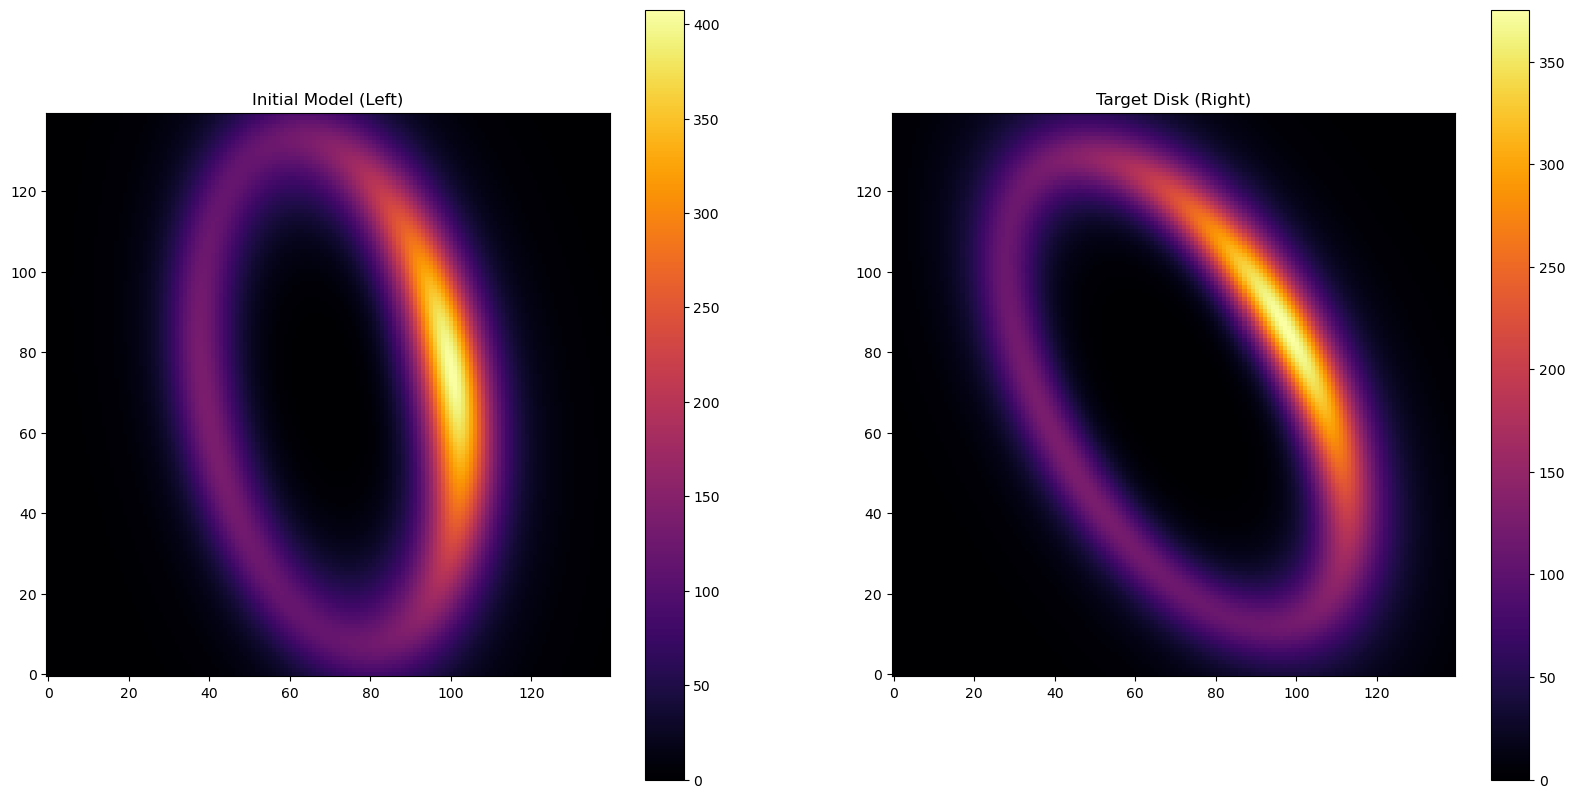

In [15]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

im = axes[0].imshow(disk_image2, origin='lower', cmap='inferno')
axes[0].set_title("Initial Model (Left)")
plt.colorbar(im,ax=axes[0])

im = axes[1].imshow(disk_image1, origin='lower', cmap='inferno')
axes[1].set_title("Target Disk (Right)")
plt.colorbar(im,ax=axes[1])

## Add Noise

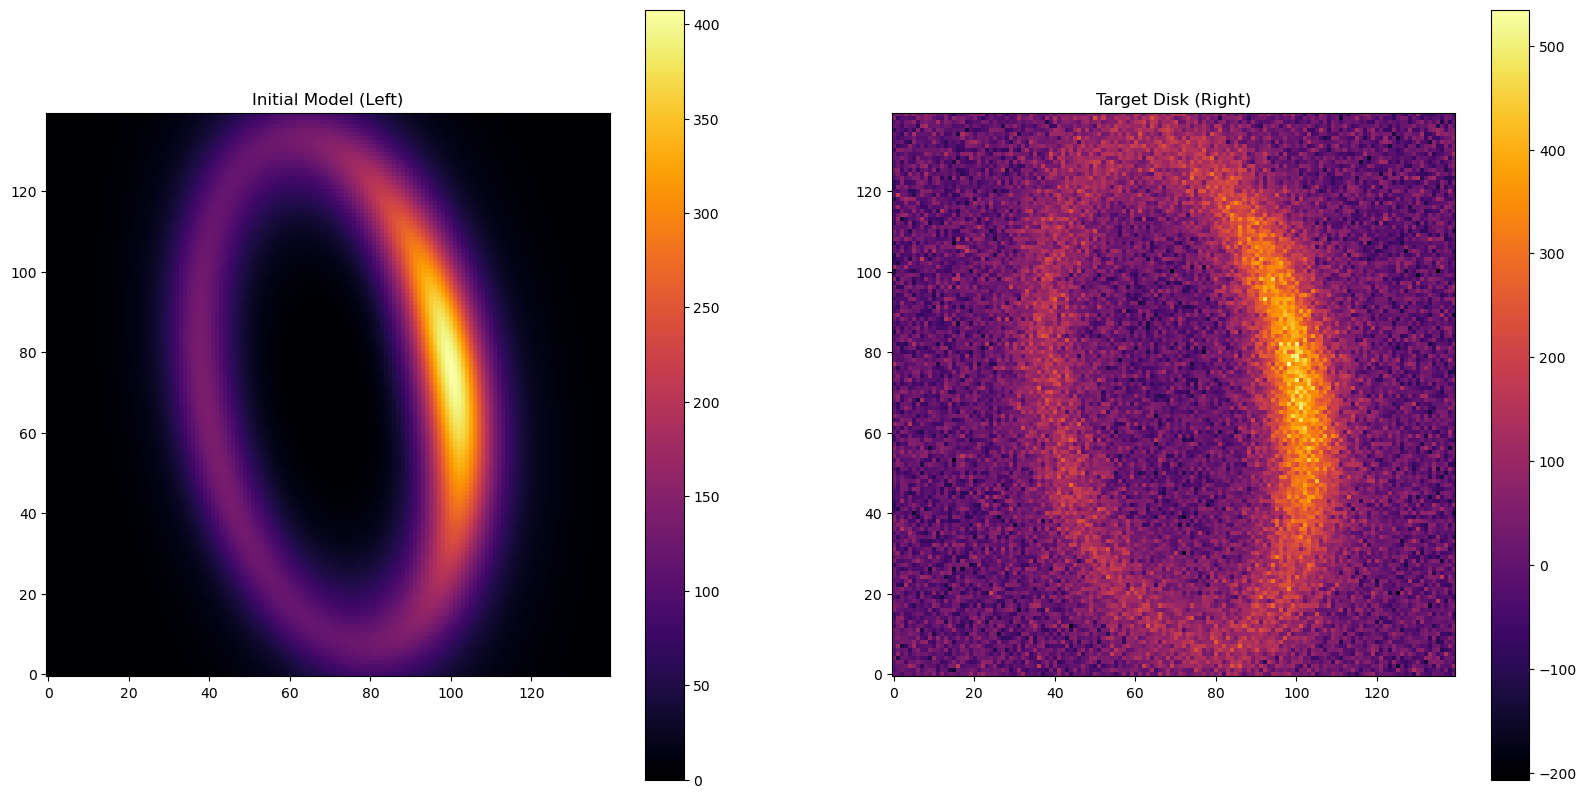

In [22]:
noise_level = 50
noise = np.random.normal(0, noise_level, disk_image1.shape)

fig, axes = plt.subplots(1,2, figsize=(20,10))

im = axes[0].imshow(disk_image2, origin='lower', cmap='inferno')
axes[0].set_title("Initial Model (Left)")
plt.colorbar(im,ax=axes[0])

im = axes[1].imshow(disk_image2+noise, origin='lower', cmap='inferno')
axes[1].set_title("Target Disk (Right)")
plt.colorbar(im,ax=axes[1])

In [23]:
spf_params={'g1': 0.5, 'g2': -0.3, 'weight': 0.7}
likelihood(DustEllipticalDistribution2PowerLaws,DoubleHenyeyGreenstein_SPF,disk_params2,spf_params,disk_image2+noise,np.ones(disk_image2.shape)*noise_level)

Array(-4511784.5, dtype=float32)

In [24]:
likelihood(DustEllipticalDistribution2PowerLaws,DoubleHenyeyGreenstein_SPF,disk_params1,spf_params,disk_image2+noise,np.ones(disk_image2.shape)*noise_level)

Array(-13552616., dtype=float32)

In [25]:
grad_func = jax.grad(likelihood, argnums=(2,3))
print(grad_func(DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, disk_params1, spf_params, disk_image2+noise, np.ones(disk_image2.shape)*noise_level))

({'alpha_in': Array(nan, dtype=float32, weak_type=True), 'alpha_out': Array(nan, dtype=float32, weak_type=True), 'flux_scaling': Array(4.669213, dtype=float32, weak_type=True), 'inclination': Array(0., dtype=float32, weak_type=True), 'position_angle': Array(nan, dtype=float32, weak_type=True), 'sma': Array(nan, dtype=float32, weak_type=True)}, {'g1': Array(nan, dtype=float32, weak_type=True), 'g2': Array(nan, dtype=float32, weak_type=True), 'weight': Array(nan, dtype=float32, weak_type=True)})


In [12]:
grad_func(DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, disk_params1, spf_params)

({'alpha_in': Array(0., dtype=float32, weak_type=True),
  'alpha_out': Array(0., dtype=float32, weak_type=True),
  'flux_scaling': Array(1., dtype=float32, weak_type=True),
  'inclination': Array(0., dtype=float32, weak_type=True),
  'position_angle': Array(0., dtype=float32, weak_type=True),
  'sma': Array(0., dtype=float32, weak_type=True)},
 {'g1': Array(0., dtype=float32, weak_type=True),
  'g2': Array(0., dtype=float32, weak_type=True),
  'weight': Array(0., dtype=float32, weak_type=True)})

In [13]:
import numpy as np
disk_params_1d = np.array([disk_params2['alpha_in'], disk_params2['alpha_out'], disk_params2['sma'], disk_params2['inclination'],
                           disk_params2['position_angle']])

In [14]:
print(likelihood_1d(disk_params_1d, DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, spf_params, disk_params2['flux_scaling'],
                    disk_image1))

TypeError: likelihood_1d() missing 1 required positional argument: 'err_map'

In [ ]:
print(likelihood_1d(disk_params_1d, DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, spf_params, disk_params2['flux_scaling'],
                    disk_image1))

-296160000000.0


In [ ]:
from scipy.optimize import minimize

ll = lambda *args: -likelihood_1d(*args)

soln = minimize(ll, disk_params_1d, args=(DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, spf_params,
                                                     disk_params2['flux_scaling'], disk_image1))
print(soln)
print(soln.x)
print(disk_params_1d)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 296160002048.0
        x: [ 5.000e+00 -7.000e+00  4.000e+01  3.000e+01  1.000e+01]
      nit: 0
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[1 0 ... 0 0]
            [0 1 ... 0 0]
            ...
            [0 0 ... 1 0]
            [0 0 ... 0 1]]
     nfev: 6
     njev: 1
[ 5. -7. 40. 30. 10.]
[ 5. -7. 40. 30. 10.]


In [ ]:
disk_fit = {}
disk_fit['alpha_in'] = soln.x[0]
disk_fit['alpha_out'] = soln.x[1]
disk_fit['sma'] = soln.x[2]
disk_fit['inclination'] = soln.x[3]
disk_fit['position_angle'] = soln.x[4]
disk_fit['flux_scaling'] = disk_params2['flux_scaling']

In [ ]:
disk_image_fit = jax_model(DustEllipticalDistribution2PowerLaws, DoubleHenyeyGreenstein_SPF, disk_params=disk_fit,
                               spf_params={'g1': 0.5, 'g2': -0.3, 'weight': 0.7})

Text(0.5, 1.0, 'Targer Disk (Right)')

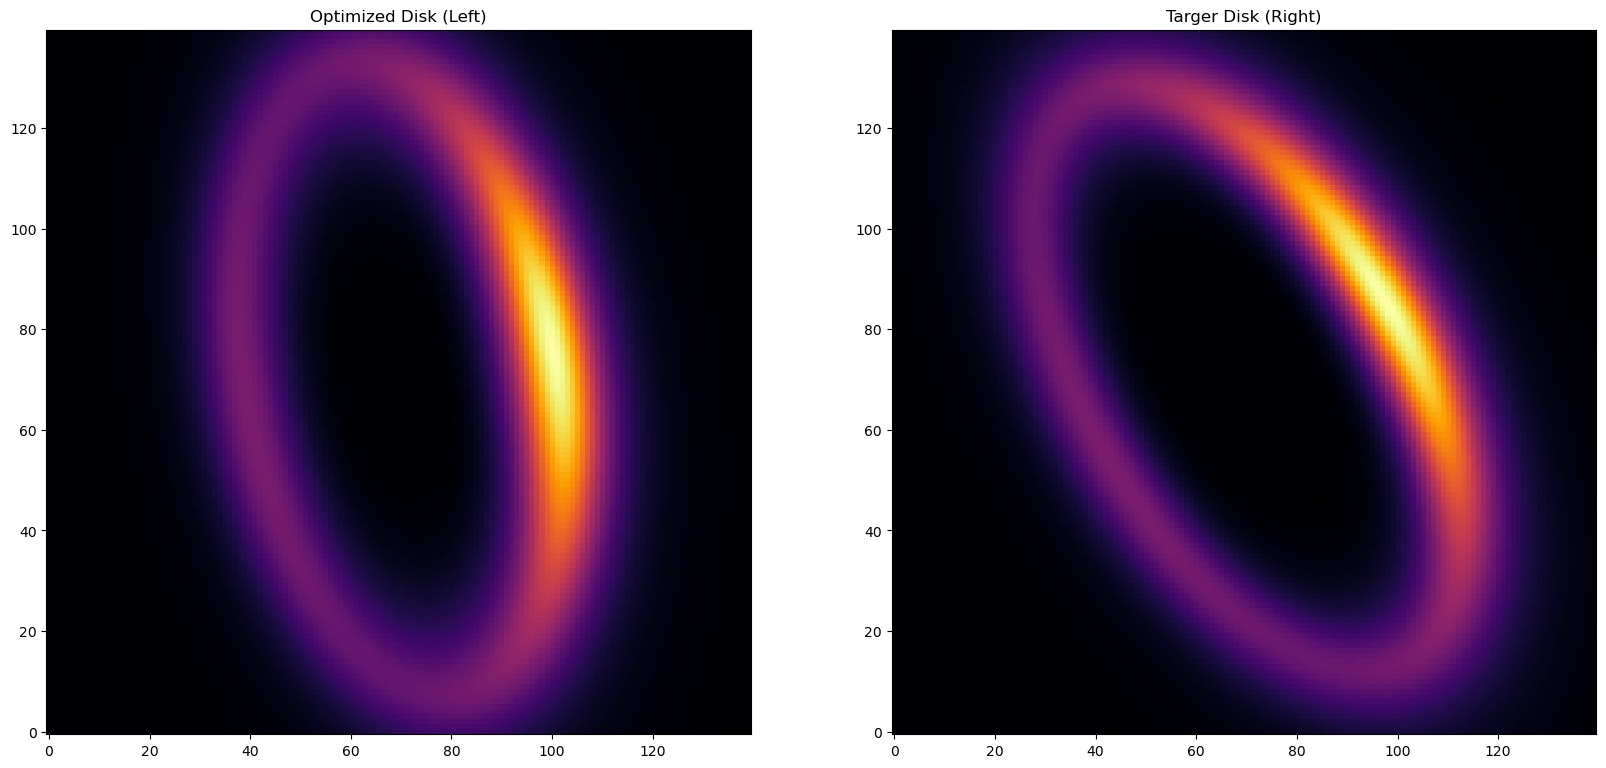

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

axes[0].imshow(disk_image_fit, origin='lower', cmap='inferno')
axes[0].set_title("Optimized Disk (Left)")

axes[1].imshow(disk_image1, origin='lower', cmap='inferno')
axes[1].set_title("Targer Disk (Right)")